## TWP-ICE Convective organization as a function of Pope et al. (2008) regime

In [16]:
# Load required libraries
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates
import math
%matplotlib inline

In [29]:
CY_cdf = Dataset('/home/rjackson/data/num_clusters.cdf', mode='r')

classification = CY_cdf.variables['N'][:]
year_t = CY_cdf.variables['year'][:]
month_t = CY_cdf.variables['month'][:]
day_t = CY_cdf.variables['day'][:]
hour_t = CY_cdf.variables['hour'][:]
minute_t = CY_cdf.variables['minute'][:]

date_array_tobin = []
for i in range(0,len(year_t)):
    dat = datetime.datetime(year_t[i],month_t[i],day_t[i],hour_t[i],minute_t[i],)
    date_array_tobin.append(dat)

CY_cdf = Dataset('/home/rjackson/data/Pope_regime.cdf', mode='r')

groups = CY_cdf.variables['groups'][:]
year = CY_cdf.variables['year'][:]
month = CY_cdf.variables['month'][:]
day = CY_cdf.variables['day'][:]

date_array_pope = []
for i in range(0,len(year)):
    dat = datetime.datetime(int(year[i]),int(month[i]),int(day[i]))
    date_array_pope.append(dat)

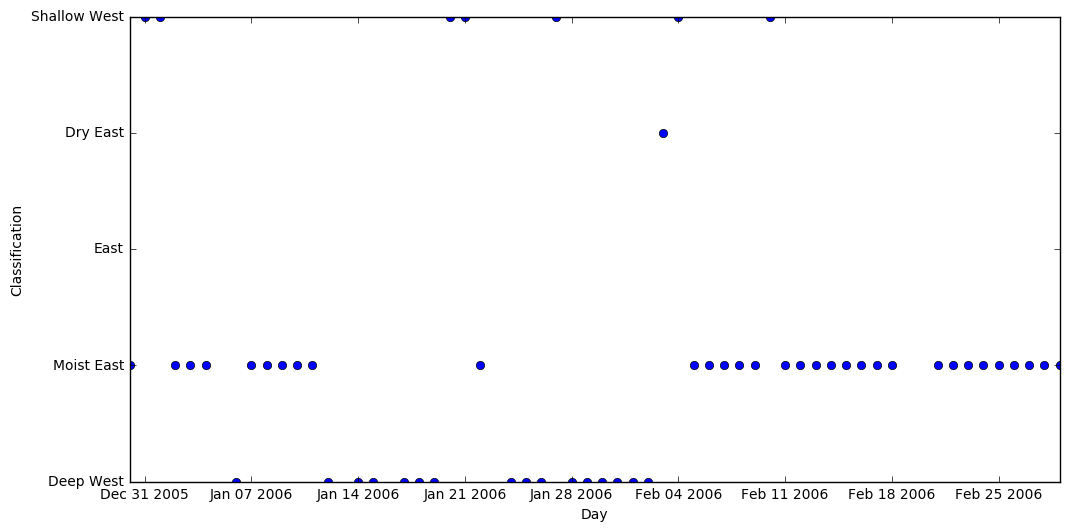

In [27]:
plt.figure(figsize=(12,6))
ax = plt.plot_date(dates.date2num(date_array_pope[717:773]), groups[717:773])
plt.xlabel('Day')
plt.ylabel('Classification')
plt.gca().set_yticks([0,1,2,3,4])
plt.gca().set_yticklabels(['Deep West', 'Moist East', 'East', 'Dry East', 'Shallow West'])

/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:648: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


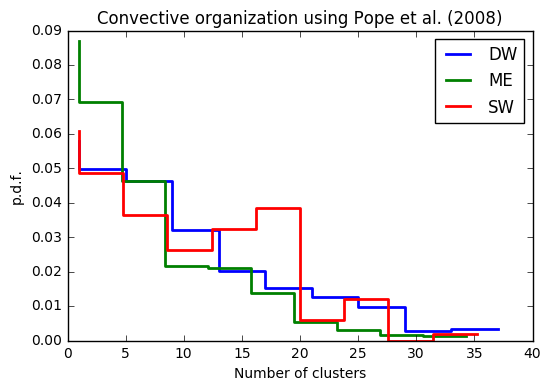

In [87]:
i = 0
N_deep_west = []
N_shallow_west = []
N_east = []
N_dry_east = []
N_moist_east = []

for dates in date_array_pope:
    i = i + 1
    if(dates.year == 2006):
        date_indicies = np.where(np.logical_and(month_t == dates.month,
                                                day_t == dates.day))
        if(groups[i] == 0):
            N_deep_west.append(classification[date_indicies])
        elif(groups[i] == 1):
            N_moist_east.append(classification[date_indicies])
        elif(groups[i] == 2):
            N_east.append(classification[date_indicies])
        elif(groups[i] == 3):
            N_dry_east.append(classification[date_indicies])
        else:
            N_shallow_west.append(classification[date_indicies])
            
N_dw = np.array([item for sublist in N_deep_west for item in sublist])
N_me = np.array([item for sublist in N_moist_east for item in sublist])
N_e = np.array([item for sublist in N_east for item in sublist])
N_de = np.array([item for sublist in N_dry_east for item in sublist])
N_sw = np.array([item for sublist in N_shallow_west for item in sublist])

dw, bins_dw = np.histogram(N_dw[N_dw > 0], 10, density=True)
me, bins_me = np.histogram(N_me[N_me > 0], 10, density=True)
e, bins_e = np.histogram(N_e[N_e > 0], 10, density=True)
de, bins_de = np.histogram(N_de[N_de > 0], 10, density=True)
sw, bins_sw = np.histogram(N_sw[N_sw > 0], 10, density=True)

plt.figure
a = plt.step(bins_dw[0:-1], dw, label="DW", linewidth=2)
b = plt.step(bins_me[0:-1], me, label="ME", linewidth=2)
#c = plt.step(bins_e[0:-1], e, label="E", linewidth=2)
#d = plt.step(bins_de[0:-1], de, label="DE", linewidth=2)
e = plt.step(bins_sw[0:-1], sw, label="SW", linewidth=2)
plt.legend(['DW','ME','SW'])
plt.title('Convective organization using Pope et al. (2008)')
plt.xlabel('Number of clusters')
plt.ylabel('p.d.f.')

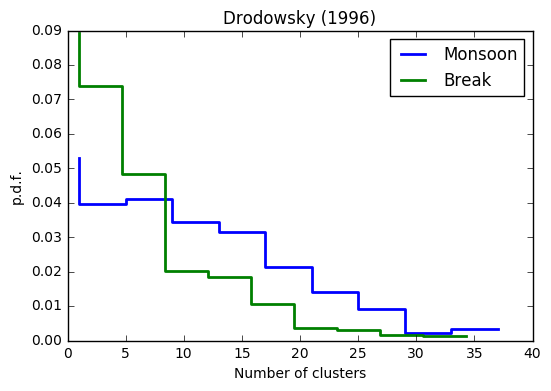

In [86]:
i = 0
N_monsoon = []
N_break = []

monsoon_start_dates = [datetime.datetime(year=2006, month=1, day=14),
                       datetime.datetime(year=2006, month=1, day=21)]
monsoon_end_dates = [datetime.datetime(year=2006, month=1, day=22),
                     datetime.datetime(year=2006, month=2, day=4)]

for dates in date_array_pope:
    i = i + 1
    if(dates.year == 2006):
        date_indicies = np.where(np.logical_and(month_t == dates.month,
                                                day_t == dates.day))
        if(dates >= monsoon_start_dates[0] and 
           dates <= monsoon_end_dates[0]):
            N_monsoon.append(classification[date_indicies])
        elif(dates >= monsoon_start_dates[1] and 
             dates <= monsoon_end_dates[1]):
            N_monsoon.append(classification[date_indicies])
        else:
            N_break.append(classification[date_indicies])
            
N_dw = np.array([item for sublist in N_monsoon for item in sublist])
N_me = np.array([item for sublist in N_break for item in sublist])


dw, bins_dw = np.histogram(N_dw[N_dw > 0], 10, density=True)
me, bins_me = np.histogram(N_me[N_me > 0], 10, density=True)


plt.figure
a = plt.step(bins_dw[0:-1], dw, label="Monsoon", linewidth=2)
b = plt.step(bins_me[0:-1], me, label="Break", linewidth=2)
plt.legend(['Monsoon', 'Break'])
plt.xlabel('Number of clusters')
plt.ylabel('p.d.f.')
plt.title('Drodowsky (1996)')